#Exploratory Data Analysis: Amsterdam Airbnb Listing 

I stumbled upon an article in Medium telling that Airbnb data from http://insideairbnb.com/get-the-data.html is one of great data sources to start creating data science project. Beside, I already familiar with the feature of Airbnb thus it will help me to retrieve insights from it. At first I really want to choose Indonesia data but I found it absent in the website and decided to go with the Amsterdam instead.

In [4]:
#importing packages before starting the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('listing_amsterdam.csv')
#preview the data frame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.95,1,123
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,236,1,339,2020-04-09,2.58,2,3
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.14,1,33
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,219,2020-07-25,2.01,1,219
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.68,2,346


In [6]:
#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522 entries, 0 to 18521
Data columns (total 16 columns):
id                                18522 non-null int64
name                              18489 non-null object
host_id                           18522 non-null int64
host_name                         18467 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     18522 non-null object
latitude                          18522 non-null float64
longitude                         18522 non-null float64
room_type                         18522 non-null object
price                             18522 non-null int64
minimum_nights                    18522 non-null int64
number_of_reviews                 18522 non-null int64
last_review                       16147 non-null object
reviews_per_month                 16147 non-null float64
calculated_host_listings_count    18522 non-null int64
availability_365                  18522 non-null int64
dt

Majority of the columns contains non-null value, but 5 columns aren't. For neighbor_group, last_review, review_per_month columns won't be utilized for the analysis so we will drop the column while name and host_name's null values will be drop as the number is small.

In [7]:
#drop unrelevant columns
df_new = df.drop(['neighbourhood_group', 'last_review', 'reviews_per_month'], axis=1)
#drop null values
listing = df_new.dropna(axis=0, how='any')
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18434 entries, 0 to 18521
Data columns (total 13 columns):
id                                18434 non-null int64
name                              18434 non-null object
host_id                           18434 non-null int64
host_name                         18434 non-null object
neighbourhood                     18434 non-null object
latitude                          18434 non-null float64
longitude                         18434 non-null float64
room_type                         18434 non-null object
price                             18434 non-null int64
minimum_nights                    18434 non-null int64
number_of_reviews                 18434 non-null int64
calculated_host_listings_count    18434 non-null int64
availability_365                  18434 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


After dropping the columns and null values, further analysis can now be performed.
The first essential step is looking at data distribution. I'll only look to price and availability_365. 

C:\Users\User1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User1\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


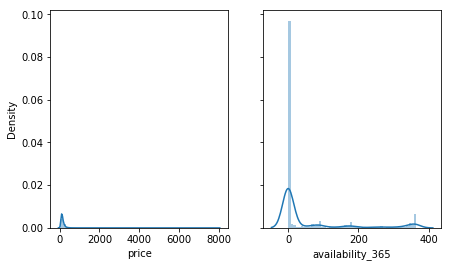

In [12]:
#using seaborn to look at data distribution
import seaborn as sns
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,4))
sns.distplot(listing['price'], kde=True, ax=ax0)
sns.distplot(listing['availability_365'], kde=True, ax=ax1)
plt.show()

The majority of the listing's price is less than 1000, but as there are outliers we can't see the detail. Next, I'm going to look at price distribution based on the room type using box plot. Shown that the entire home/apt has extreme outliers and higher median that other types of the room. Private room is the cheapest type of room.
For the availability, entire home or apartment has the highest occupancy rate compared to others.

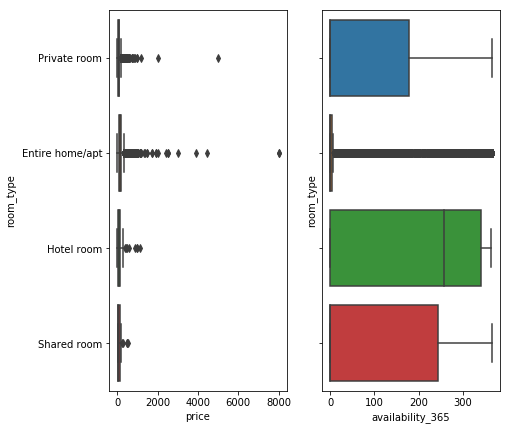

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,7))
sns.boxplot(data=listing, x='price', y='room_type', ax=ax0)
sns.boxplot(data=listing, x='availability_365', y='room_type', ax=ax1)
plt.show()

After knowing the data distribution, it's advisable to know the relationship between variables. As shown in the figure below there is no definite relationship between price and the availability. Proved by the low number of correlation.

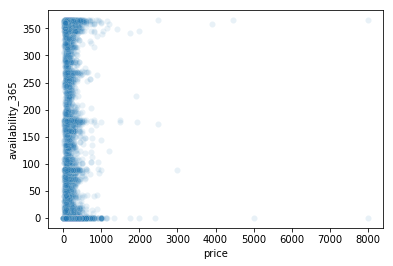

,price,availability_365
price,1.000000,0.066848
availability_365,0.066848,1.000000


In [24]:
sns.scatterplot(x='price', y='availability_365', data=listing, alpha=0.1, x_jitter=True)
plt.show()

column = ['price', 'availability_365']
subset = listing[column]
subset.corr()

I also want to look at the average price of listing by the neighbourhood to determine which area has the cheapest price.

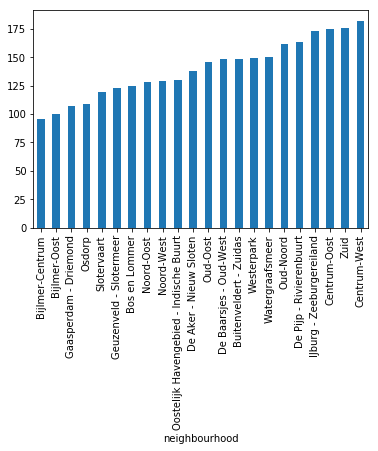

In [26]:
avg_price = listing.groupby('neighbourhood').price.mean()
avg_price.sort_values().plot(kind='bar')
plt.show()

So if we visit Amsterdam with tight budget and choosing airbnb to provide the accomodation, we can select Bijlmer-Centrum area with private room type.